## Lab 4
#  P24DS005
#  Aditya Thombare

Compute the Discrete Fourier Transform (DFT) of an Image•Compute the DFT of a grayscale image and visualize its frequency domain representation.

–Read a grayscale image.

–Compute its 2D DFT–Display the magnitude spectrum of the DFT

•Perform Inverse DFT to Reconstruct the Original Image.

•Visualize the magnitude and phase spectra of an image using its DFT.

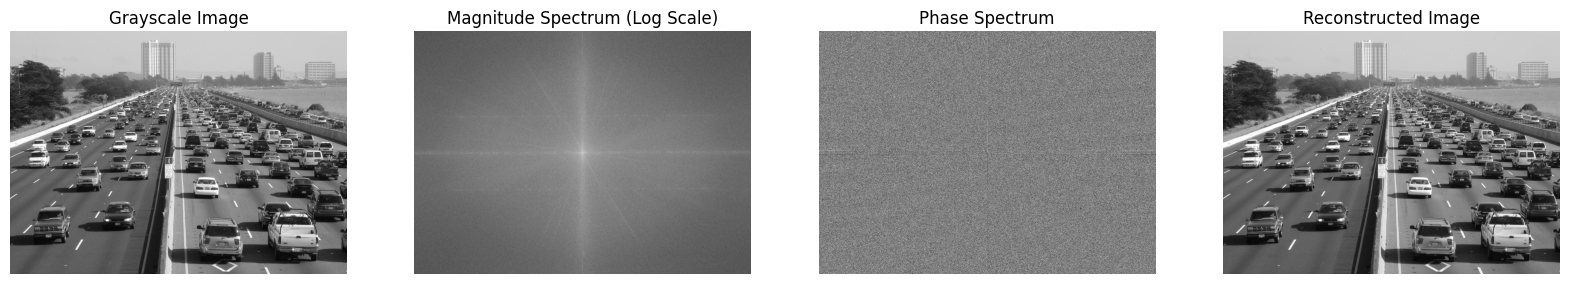

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Optimized function to compute 2D DFT
def dft2d(image):
    rows, cols = image.shape
    u = np.arange(rows)
    v = np.arange(cols)
    x = np.arange(rows)
    y = np.arange(cols)
    
    # Create meshgrid
    U, X = np.meshgrid(u, x)
    V, Y = np.meshgrid(v, y)
    
    # Compute the DFT using vectorized matrix multiplications
    exp_u = np.exp(-2j * np.pi * U * X / rows)
    exp_v = np.exp(-2j * np.pi * V * Y / cols)
    
    dft_output = exp_u @ image @ exp_v
    return dft_output

# Optimized function to compute 2D inverse DFT
def idft2d(dft_image):
    rows, cols = dft_image.shape
    u = np.arange(rows)
    v = np.arange(cols)
    x = np.arange(rows)
    y = np.arange(cols)
    
    # Create meshgrid
    U, X = np.meshgrid(u, x)
    V, Y = np.meshgrid(v, y)
    
    # Compute the inverse DFT using vectorized matrix multiplications
    exp_u = np.exp(2j * np.pi * U * X / rows)
    exp_v = np.exp(2j * np.pi * V * Y / cols)
    
    idft_output = exp_u @ dft_image @ exp_v
    return idft_output / (rows * cols)  # Normalize

# Step 1: Read the grayscale image
image = cv2.imread('image_7.jpeg', cv2.IMREAD_GRAYSCALE)

# Step 2: Compute the 2D DFT of the image
dft = dft2d(image)
dft_shifted = np.fft.fftshift(dft)  # Shift the zero frequency component to the center

# Step 3: Compute the magnitude and phase spectra
magnitude_spectrum = np.abs(dft_shifted)
phase_spectrum = np.angle(dft_shifted)

# Apply log scaling for better visualization of the magnitude spectrum
magnitude_spectrum_log = 20 * np.log(magnitude_spectrum + 1)  # +1 to avoid log(0)

# Step 4: Apply the inverse DFT using the optimized inverse DFT function to reconstruct the image
dft_inverse_shifted = np.fft.ifftshift(dft_shifted)  # Shift back the zero frequency component
image_reconstructed = idft2d(dft_inverse_shifted)  # Apply inverse DFT
image_reconstructed = np.abs(image_reconstructed)  # Get the magnitude of the reconstructed image

# Step 5: Display the original image, magnitude spectrum, phase spectrum, and reconstructed image
plt.figure(figsize=(20, 5))

# Display the grayscale image
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Display the magnitude spectrum
plt.subplot(1, 4, 2)
plt.imshow(magnitude_spectrum_log, cmap='gray')
plt.title('Magnitude Spectrum (Log Scale)')
plt.axis('off')

# Display the phase spectrum
plt.subplot(1, 4, 3)
plt.imshow(phase_spectrum, cmap='gray')
plt.title('Phase Spectrum')
plt.axis('off')

# Display the reconstructed image
plt.subplot(1, 4, 4)
plt.imshow(image_reconstructed, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()


-Observation: Different image spectrum are observed

 Define and apply a ideal low-pass filter in the DFT domain
 
 •Define a circular low-pass filter in the DFT domain.
 
 •Apply the filter to the DFT of the image.
 
 •Perform the inverse DFT to obtain the filtered image.
 
 •Display the magnitude spectrum of the filter, the original image, and the filtered image.

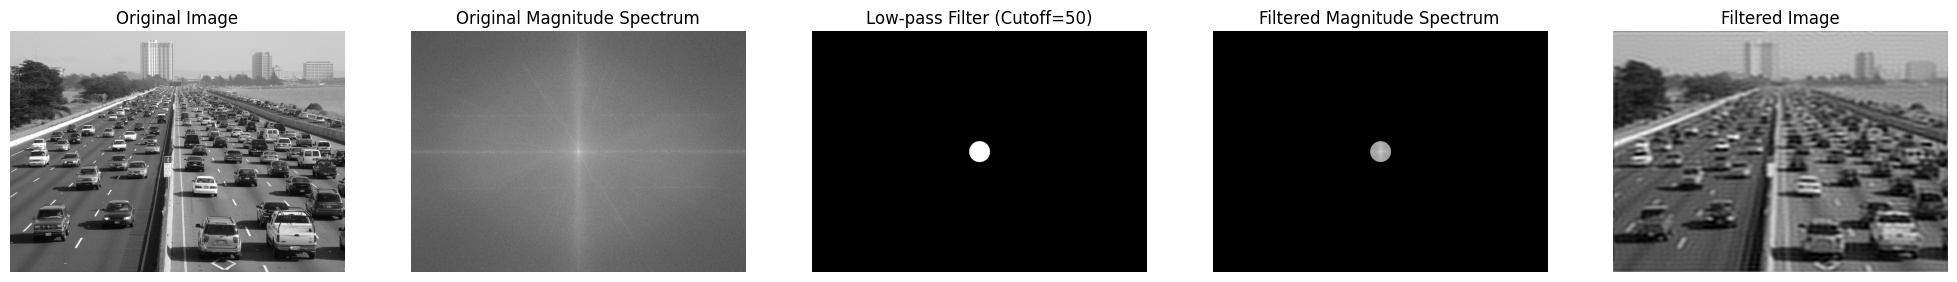

In [9]:
# Function to create an ideal low-pass filter
def ideal_low_pass_filter(shape, cutoff_radius):
    rows, cols = shape
    center_x, center_y = rows // 2, cols // 2
    filter_mask = np.zeros((rows, cols))
    
    for x in range(rows):
        for y in range(cols):
            distance = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
            if distance <= cutoff_radius:
                filter_mask[x, y] = 1  # Allow low frequencies
            else:
                filter_mask[x, y] = 0  # Block high frequencies
                
    return filter_mask

# Step 1: Read the grayscale image
image = cv2.imread('image_7.jpeg', cv2.IMREAD_GRAYSCALE)

# Step 2: Compute the 2D DFT of the image
dft = dft2d(image)
dft_shifted = np.fft.fftshift(dft)  # Shift the zero frequency component to the center

# Step 3: Define and apply an ideal low-pass filter
cutoff_radius = 50  # Adjust this value to control how much of the high frequencies are filtered
filter_mask = ideal_low_pass_filter(dft_shifted.shape, cutoff_radius)

# Apply the filter in the frequency domain
dft_filtered = dft_shifted * filter_mask

# Step 4: Perform the inverse DFT using the optimized IDFT function to get the filtered image
dft_inverse_shifted = np.fft.ifftshift(dft_filtered)  # Shift back the zero frequency component
filtered_image = idft2d(dft_inverse_shifted)
filtered_image = np.abs(filtered_image)  # Get the magnitude of the filtered image

# Step 5: Compute the magnitude spectrum for visualization
magnitude_spectrum_filtered = 20 * np.log(np.abs(dft_filtered) + 1)  # Log scale for better visualization

# Step 6: Display the original image, magnitude spectrum of the filter, and the filtered image
plt.figure(figsize=(25, 5))

# Display the grayscale original image
plt.subplot(1, 5, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display the magnitude spectrum of the original image
magnitude_spectrum = 20 * np.log(np.abs(dft_shifted) + 1)
plt.subplot(1, 5, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Original Magnitude Spectrum')
plt.axis('off')

# Display the filter mask (ideal low-pass filter)
plt.subplot(1, 5, 3)
plt.imshow(filter_mask, cmap='gray')
plt.title(f'Low-pass Filter (Cutoff={cutoff_radius})')
plt.axis('off')

# Display the magnitude spectrum of the low-pass filter
plt.subplot(1, 5, 4)
plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.title('Filtered Magnitude Spectrum')
plt.axis('off')

# Display the filtered image
plt.subplot(1, 5, 5)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()

-Observation: image is smoothened

Define and apply a ideal High-pass filter in the DFT domain

•Define a circular low-pass filter in the DFT domain.

•Apply the filter to the DFT of the image.

•Perform the inverse DFT to obtain the filtered image.

•Try different combination of D0

•Display the magnitude spectrum of the filter, the original image, and the filtered image.

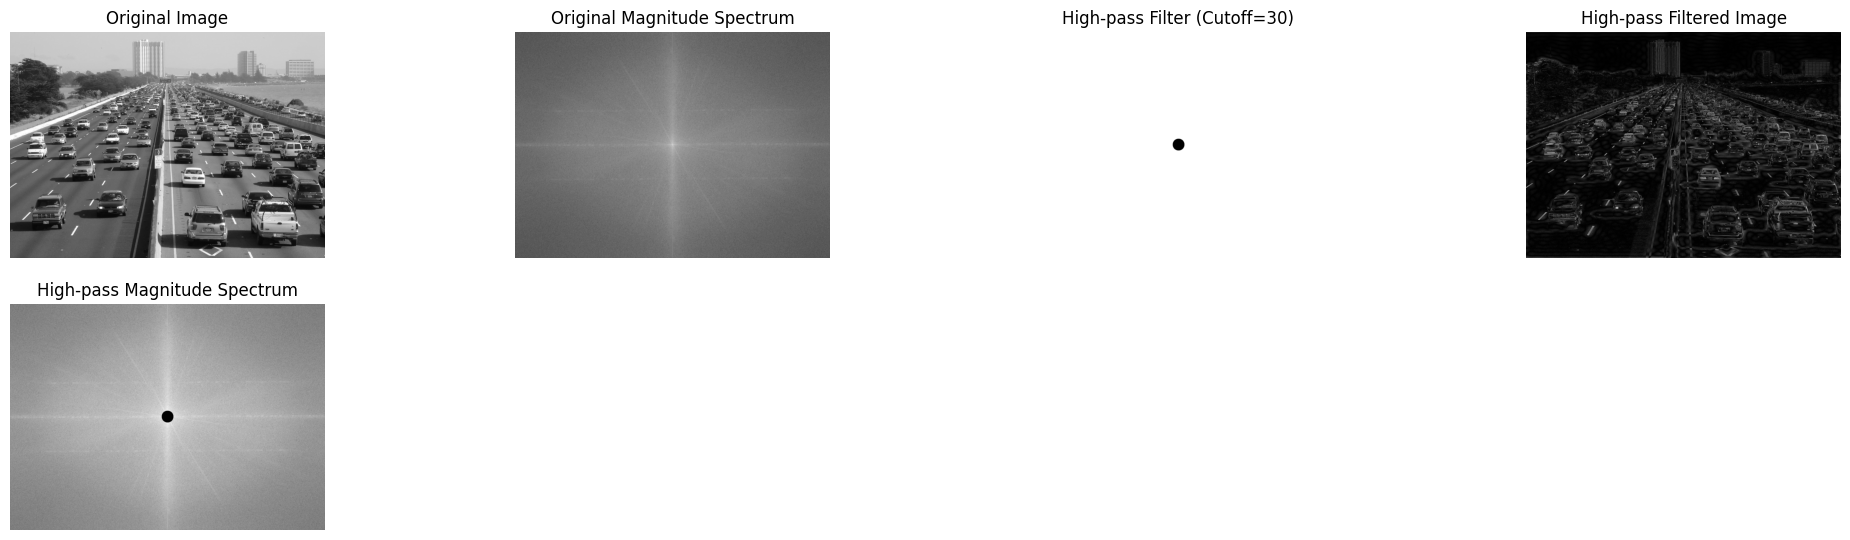

In [12]:
# Function to create an ideal high-pass filter
def ideal_high_pass_filter(shape, cutoff_radius):
    rows, cols = shape
    center_x, center_y = rows // 2, cols // 2
    filter_mask = np.ones((rows, cols))
    
    for x in range(rows):
        for y in range(cols):
            distance = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
            if distance <= cutoff_radius:
                filter_mask[x, y] = 0  # Block low frequencies
            else:
                filter_mask[x, y] = 1  # Allow high frequencies
                
    return filter_mask

# Step 1: Read the grayscale image
image = cv2.imread('image_7.jpeg', cv2.IMREAD_GRAYSCALE)

# Step 2: Compute the 2D DFT of the image
dft = dft2d(image)
dft_shifted = np.fft.fftshift(dft)  # Shift the zero frequency component to the center

# Step 3: Define and apply an ideal low-pass filter and an ideal high-pass filter
cutoff_radius_lp = 50  # Low-pass filter cutoff
cutoff_radius_hp = 30  # High-pass filter cutoff

low_pass_filter = ideal_low_pass_filter(dft_shifted.shape, cutoff_radius_lp)
high_pass_filter = ideal_high_pass_filter(dft_shifted.shape, cutoff_radius_hp)

# Apply the low-pass filter
dft_low_pass_filtered = dft_shifted * low_pass_filter
dft_high_pass_filtered = dft_shifted * high_pass_filter

# Step 4: Perform the inverse DFT using the optimized IDFT function to get the filtered images
# For low-pass filter
dft_inverse_lp = np.fft.ifftshift(dft_low_pass_filtered)
filtered_image_lp = idft2d(dft_inverse_lp)
filtered_image_lp = np.abs(filtered_image_lp)  # Get the magnitude of the filtered image

# For high-pass filter
dft_inverse_hp = np.fft.ifftshift(dft_high_pass_filtered)
filtered_image_hp = idft2d(dft_inverse_hp)
filtered_image_hp = np.abs(filtered_image_hp)  # Get the magnitude of the filtered image

# Step 5: Compute the magnitude spectra for visualization
magnitude_spectrum_lp = 20 * np.log(np.abs(dft_low_pass_filtered) + 1)  # Log scale for better visualization
magnitude_spectrum_hp = 20 * np.log(np.abs(dft_high_pass_filtered) + 1)

# Step 6: Display the results
plt.figure(figsize=(25, 10))

# Display the original image
plt.subplot(3, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display the magnitude spectrum of the original image
magnitude_spectrum = 20 * np.log(np.abs(dft_shifted) + 1)
plt.subplot(3, 4, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Original Magnitude Spectrum')
plt.axis('off')

# Display the high-pass filter mask
plt.subplot(3, 4, 3)
plt.imshow(high_pass_filter, cmap='gray')
plt.title(f'High-pass Filter (Cutoff={cutoff_radius_hp})')
plt.axis('off')

# Display the filtered image (high-pass)
plt.subplot(3, 4, 4)
plt.imshow(filtered_image_hp, cmap='gray')
plt.title('High-pass Filtered Image')
plt.axis('off')

# Display the magnitude spectrum of the high-pass filtered image
plt.subplot(3, 4, 5)
plt.imshow(magnitude_spectrum_hp, cmap='gray')
plt.title('High-pass Magnitude Spectrum')
plt.axis('off')

plt.show()

-Observation: Image is sharpened

Define and apply a Gaussian low-pass filter (GLPF) and Gaussian high-pass filter (GHPF) in the DFTdomain

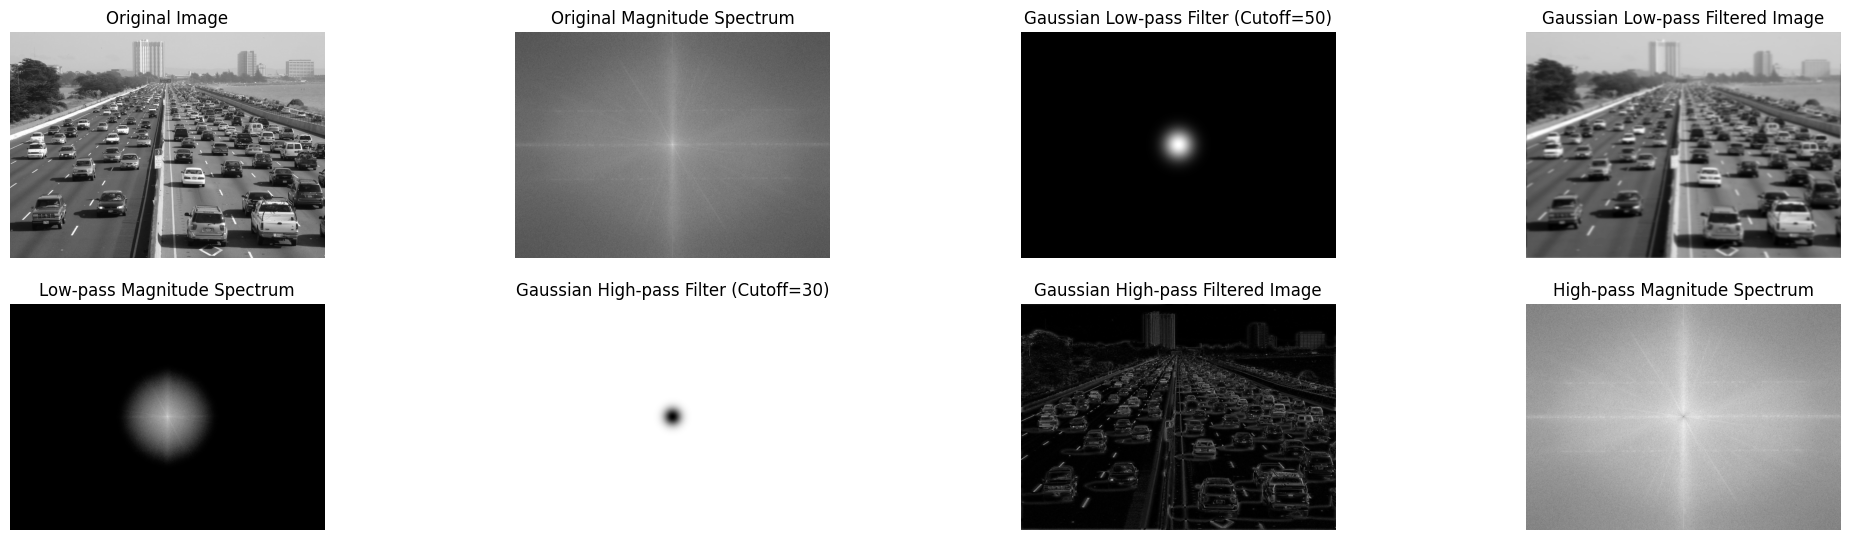

In [18]:
# Function to create a Gaussian low-pass filter
def gaussian_low_pass_filter(shape, cutoff_radius):
    rows, cols = shape
    center_x, center_y = rows // 2, cols // 2
    filter_mask = np.zeros((rows, cols))
    
    for x in range(rows):
        for y in range(cols):
            distance = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
            filter_mask[x, y] = np.exp(-distance ** 2 / (2 * (cutoff_radius ** 2)))
    
    return filter_mask

# Function to create a Gaussian high-pass filter
def gaussian_high_pass_filter(shape, cutoff_radius):
    rows, cols = shape
    center_x, center_y = rows // 2, cols // 2
    filter_mask = np.zeros((rows, cols))
    
    for x in range(rows):
        for y in range(cols):
            distance = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
            filter_mask[x, y] = 1 - np.exp(-distance ** 2 / (2 * (cutoff_radius ** 2)))
    
    return filter_mask

# Step 1: Read the grayscale image
image = cv2.imread('image_7.jpeg', cv2.IMREAD_GRAYSCALE)

# Step 2: Compute the 2D DFT of the image
dft = dft2d(image)
dft_shifted = np.fft.fftshift(dft)  # Shift the zero frequency component to the center

# Step 3: Define and apply a Gaussian low-pass filter and Gaussian high-pass filter
cutoff_radius_lp = 50  # Low-pass filter cutoff
cutoff_radius_hp = 30  # High-pass filter cutoff

gaussian_lp_filter = gaussian_low_pass_filter(dft_shifted.shape, cutoff_radius_lp)
gaussian_hp_filter = gaussian_high_pass_filter(dft_shifted.shape, cutoff_radius_hp)

# Apply the low-pass filter
dft_gaussian_lp_filtered = dft_shifted * gaussian_lp_filter
dft_gaussian_hp_filtered = dft_shifted * gaussian_hp_filter

# Step 4: Perform the inverse DFT using the optimized IDFT function to get the filtered images
# For low-pass filter
dft_inverse_lp = np.fft.ifftshift(dft_gaussian_lp_filtered)
filtered_image_lp = idft2d(dft_inverse_lp)
filtered_image_lp = np.abs(filtered_image_lp)  # Get the magnitude of the filtered image

# For high-pass filter
dft_inverse_hp = np.fft.ifftshift(dft_gaussian_hp_filtered)
filtered_image_hp = idft2d(dft_inverse_hp)
filtered_image_hp = np.abs(filtered_image_hp)  # Get the magnitude of the filtered image

# Step 5: Compute the magnitude spectra for visualization
magnitude_spectrum_lp = 20 * np.log(np.abs(dft_gaussian_lp_filtered) + 1)  # Log scale for better visualization
magnitude_spectrum_hp = 20 * np.log(np.abs(dft_gaussian_hp_filtered) + 1)

# Step 6: Display the results
plt.figure(figsize=(25, 10))

# Display the original image
plt.subplot(3, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display the magnitude spectrum of the original image
magnitude_spectrum = 20 * np.log(np.abs(dft_shifted) + 1)
plt.subplot(3, 4, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Original Magnitude Spectrum')
plt.axis('off')

# Display the Gaussian low-pass filter mask
plt.subplot(3, 4, 3)
plt.imshow(gaussian_lp_filter, cmap='gray')
plt.title(f'Gaussian Low-pass Filter (Cutoff={cutoff_radius_lp})')
plt.axis('off')

# Display the filtered image (Gaussian low-pass)
plt.subplot(3, 4, 4)
plt.imshow(filtered_image_lp, cmap='gray')
plt.title('Gaussian Low-pass Filtered Image')
plt.axis('off')

# Display the magnitude spectrum of the low-pass filtered image
plt.subplot(3, 4, 5)
plt.imshow(magnitude_spectrum_lp, cmap='gray')
plt.title('Low-pass Magnitude Spectrum')
plt.axis('off')

# Display the Gaussian high-pass filter mask
plt.subplot(3, 4, 6)
plt.imshow(gaussian_hp_filter, cmap='gray')
plt.title(f'Gaussian High-pass Filter (Cutoff={cutoff_radius_hp})')
plt.axis('off')

# Display the filtered image (Gaussian high-pass)
plt.subplot(3, 4, 7)
plt.imshow(filtered_image_hp, cmap='gray')
plt.title('Gaussian High-pass Filtered Image')
plt.axis('off')

# Display the magnitude spectrum of the high-pass filtered image
plt.subplot(3, 4, 8)
plt.imshow(magnitude_spectrum_hp, cmap='gray')
plt.title('High-pass Magnitude Spectrum')
plt.axis('off')

plt.show()

Define and apply a Butterworth Lowpass filters (BLPF) and Butterworth high-pass filter in the DFTdomain

C:\Users\erene\AppData\Local\Temp\ipykernel_31792\243414913.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  filter_mask[x, y] = 1 / (1 + (cutoff_radius / distance) ** (2 * order))


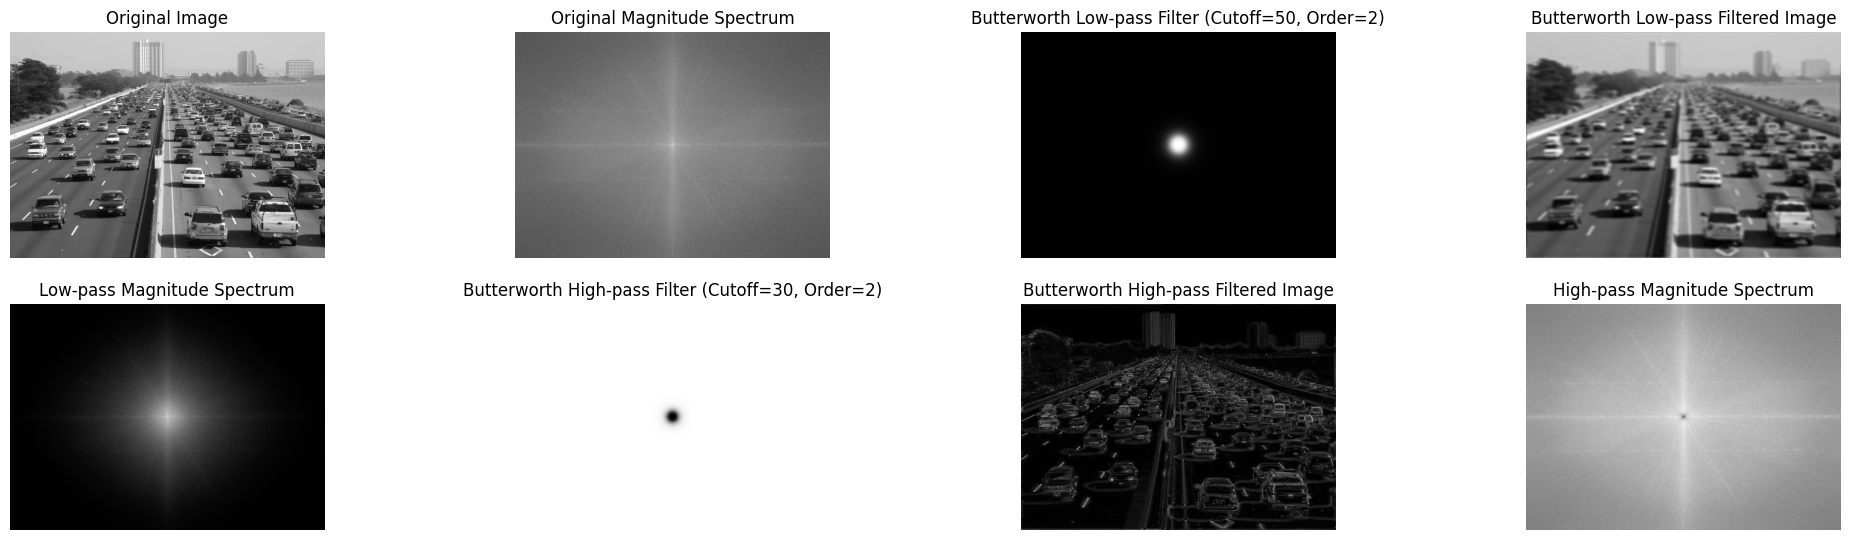

In [20]:
# Function to create a Butterworth low-pass filter
def butterworth_low_pass_filter(shape, cutoff_radius, order):
    rows, cols = shape
    center_x, center_y = rows // 2, cols // 2
    filter_mask = np.zeros((rows, cols))
    
    for x in range(rows):
        for y in range(cols):
            distance = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
            filter_mask[x, y] = 1 / (1 + (distance / cutoff_radius) ** (2 * order))
    
    return filter_mask

# Function to create a Butterworth high-pass filter
def butterworth_high_pass_filter(shape, cutoff_radius, order):
    rows, cols = shape
    center_x, center_y = rows // 2, cols // 2
    filter_mask = np.zeros((rows, cols))
    
    for x in range(rows):
        for y in range(cols):
            distance = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
            filter_mask[x, y] = 1 / (1 + (cutoff_radius / distance) ** (2 * order))
    
    return filter_mask

# Step 1: Read the grayscale image
image = cv2.imread('image_7.jpeg', cv2.IMREAD_GRAYSCALE)

# Step 2: Compute the 2D DFT of the image
dft = dft2d(image)
dft_shifted = np.fft.fftshift(dft)  # Shift the zero frequency component to the center

# Step 3: Define and apply a Butterworth low-pass and high-pass filter
cutoff_radius_lp = 50  # Low-pass filter cutoff
cutoff_radius_hp = 30  # High-pass filter cutoff
order = 2  # Butterworth filter order

butterworth_lp_filter = butterworth_low_pass_filter(dft_shifted.shape, cutoff_radius_lp, order)
butterworth_hp_filter = butterworth_high_pass_filter(dft_shifted.shape, cutoff_radius_hp, order)

# Apply the low-pass filter
dft_butterworth_lp_filtered = dft_shifted * butterworth_lp_filter
dft_butterworth_hp_filtered = dft_shifted * butterworth_hp_filter

# Step 4: Perform the inverse DFT using the optimized IDFT function to get the filtered images
# For low-pass filter
dft_inverse_lp = np.fft.ifftshift(dft_butterworth_lp_filtered)
filtered_image_lp = idft2d(dft_inverse_lp)
filtered_image_lp = np.abs(filtered_image_lp)  # Get the magnitude of the filtered image

# For high-pass filter
dft_inverse_hp = np.fft.ifftshift(dft_butterworth_hp_filtered)
filtered_image_hp = idft2d(dft_inverse_hp)
filtered_image_hp = np.abs(filtered_image_hp)  # Get the magnitude of the filtered image

# Step 5: Compute the magnitude spectra for visualization
magnitude_spectrum_lp = 20 * np.log(np.abs(dft_butterworth_lp_filtered) + 1)  # Log scale for better visualization
magnitude_spectrum_hp = 20 * np.log(np.abs(dft_butterworth_hp_filtered) + 1)

# Step 6: Display the results
plt.figure(figsize=(25, 10))

# Display the original image
plt.subplot(3, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display the magnitude spectrum of the original image
magnitude_spectrum = 20 * np.log(np.abs(dft_shifted) + 1)
plt.subplot(3, 4, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Original Magnitude Spectrum')
plt.axis('off')

# Display the Butterworth low-pass filter mask
plt.subplot(3, 4, 3)
plt.imshow(butterworth_lp_filter, cmap='gray')
plt.title(f'Butterworth Low-pass Filter (Cutoff={cutoff_radius_lp}, Order={order})')
plt.axis('off')

# Display the filtered image (Butterworth low-pass)
plt.subplot(3, 4, 4)
plt.imshow(filtered_image_lp, cmap='gray')
plt.title('Butterworth Low-pass Filtered Image')
plt.axis('off')

# Display the magnitude spectrum of the low-pass filtered image
plt.subplot(3, 4, 5)
plt.imshow(magnitude_spectrum_lp, cmap='gray')
plt.title('Low-pass Magnitude Spectrum')
plt.axis('off')

# Display the Butterworth high-pass filter mask
plt.subplot(3, 4, 6)
plt.imshow(butterworth_hp_filter, cmap='gray')
plt.title(f'Butterworth High-pass Filter (Cutoff={cutoff_radius_hp}, Order={order})')
plt.axis('off')

# Display the filtered image (Butterworth high-pass)
plt.subplot(3, 4, 7)
plt.imshow(filtered_image_hp, cmap='gray')
plt.title('Butterworth High-pass Filtered Image')
plt.axis('off')

# Display the magnitude spectrum of the high-pass filtered image
plt.subplot(3, 4, 8)
plt.imshow(magnitude_spectrum_hp, cmap='gray')
plt.title('High-pass Magnitude Spectrum')
plt.axis('off')

plt.show()